К задаче https://ru.stackoverflow.com/questions/1259494/Найти-точку-сумма-расстояний-до-которой-от-заданного-набора-точек-минимальна

In [1]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt


In [2]:
# Штраф для функции притяжения - сначала нарастает, потом убывает. На большом расстоянии уже пофиг, что там притягивает.
def attract(power, distance):
    # притягивающая часть - квадратичная сигмоидная функция
    p1 = power*distance/np.sqrt(distance+1)
    # забывание - степенная функция
    p2 = p1*(1/(distance+1))
    return p2

In [3]:
# Штраф для отталкивания - постепенно убывает. 
def repell(power, distance):
    return power*(1/(distance+1))

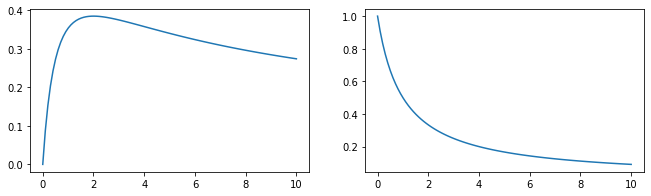

In [4]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(11,3)
x = np.linspace(0,10,100)
axs[0].plot(x, attract(1, x))
axs[1].plot(x, repell(1, x))

In [5]:
class Point:
    def __init__(self, coords, attracting, repelling):
        self.coords = np.atleast_2d(coords)
        self.attracting_power = attracting
        self.repelling_power = repelling
    def potential(self, point):
        point = np.atleast_2d(point)
        distance = np.linalg.norm(point-self.coords)
        attracting_penalty = attract(self.attracting_power, distance) if self.attracting_power > 0 else 0
        repelling_penalty = repell(self.repelling_power, distance)
        return attracting_penalty + repelling_penalty

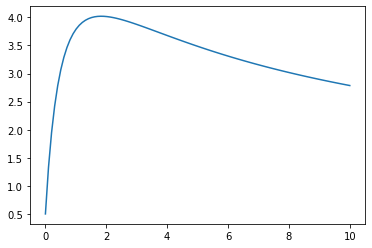

In [6]:
supermarket = Point((0.0), attracting=10, repelling=0.5)
X = np.linspace(0,10,100)
plt.plot(x, [supermarket.potential((_x,0)) for _x in X])

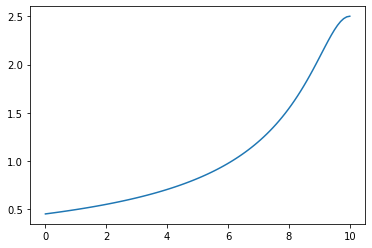

In [7]:
factory = Point((10, -1), attracting=0, repelling=5)
X = np.linspace(0,10,100)
plt.plot(x, [factory.potential((_x,0)) for _x in X])

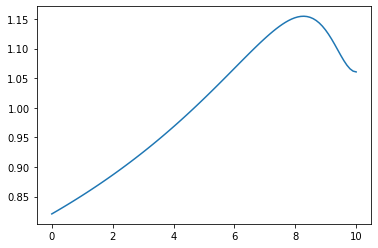

In [8]:
minishop = Point((10,1), attracting=3, repelling=0)
X = np.linspace(0,10,100)
plt.plot(x, [minishop.potential((_x,0)) for _x in X])

In [9]:
class Potential:
    def __init__(self, points):
        self.points = points
    
    def potential(self, v):
        resPot = 0.0
        for p in self.points:
            potential = p.potential(v) 
            resPot += potential
        return resPot
    def __call__(self, v):
        return self.potential(v)

In [10]:
fn = Potential((supermarket, minishop, factory))

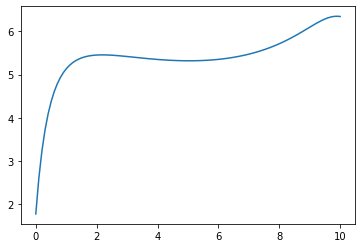

In [11]:
X = np.linspace(0,10,100)
plt.plot(x, [fn.potential((_x,0)) for _x in X])

In [12]:
X = np.linspace(-5,15,100)
Y = np.linspace(-10,10,100)


In [13]:
level = [ [ fn((x,y)) for x in X] for y in Y]


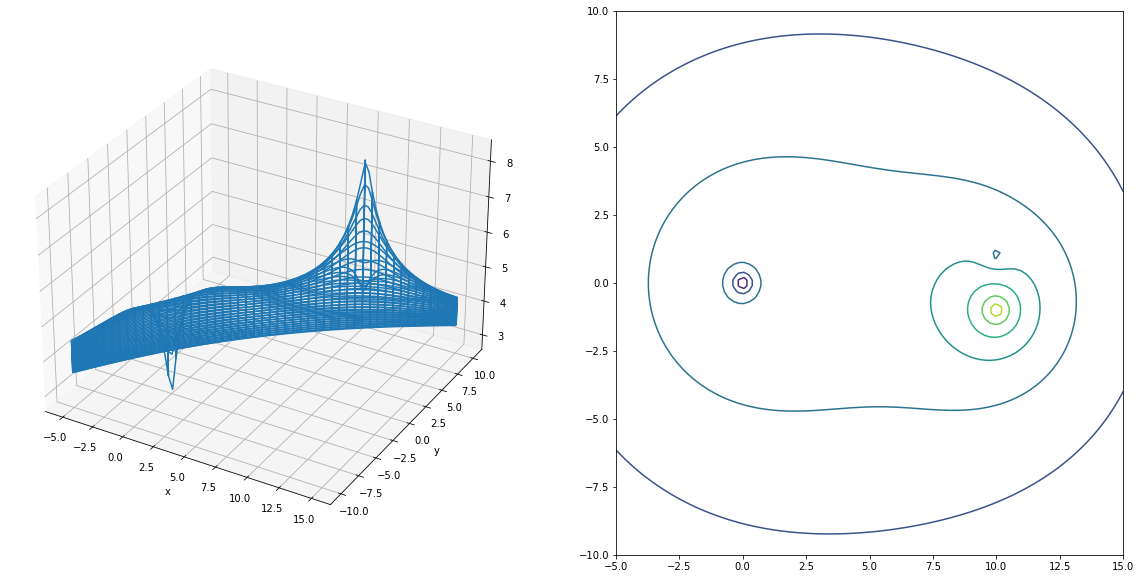

In [14]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X,Y, np.atleast_2d(level))
ax.set_xlabel('x')
ax.set_ylabel('y')

ax2 = fig.add_subplot(122)
ax2.contour(X,Y, level)

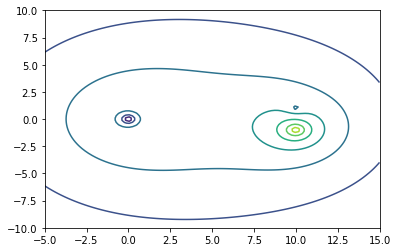

In [15]:
plt.contour(X,Y, level)

In [16]:
v = spo.minimize(fn, x0=(1,0), bounds=((-5, 15), (-10, 10)))

In [17]:
v

      fun: 1.7733099211366816
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.54659745, 0.5809764 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 210
      nit: 20
   status: 0
  success: True
        x: array([-3.93721209e-09, -4.60977379e-09])

In [18]:
fn(factory.coords)

8.936003525686507

In [19]:
fn(supermarket.coords)

1.77330986381654

In [20]:
fn(minishop.coords)

4.447969653973923

In [21]:
fn([-9171.37744367,    21.19829761])

0.13630529558762686